# Predicting HbA1c Levels in Males
This notebook builds a supervised regression model to predict HbA1c levels using demographic and health features. The model is trained specifically on males.

In [84]:
%pip install kagglehub pandas scikit-learn matplotlib seaborn
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Note: you may need to restart the kernel to use updated packages.


In [85]:
# Download dataset from KaggleHub
path = kagglehub.dataset_download("marshalpatel3558/diabetes-prediction-dataset")
print("Path to dataset files:", path)


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/marshalpatel3558/diabetes-prediction-dataset/versions/1


In [86]:
import os

# List files in the directory to verify the correct filename
print("Files in the dataset directory:", os.listdir(path))

# Load the CSV file (adjust the filename if necessary)
files = os.listdir(path)
print("Files in the dataset directory:", files)

# Update the filename based on the actual file in the directory
csv_file = [file for file in files if file.endswith('.csv')][0]
df = pd.read_csv(f"{path}/{csv_file}")
print(df.columns)
print(df.head())


Files in the dataset directory: ['diabetes_dataset.csv']
Files in the dataset directory: ['diabetes_dataset.csv']
Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')
   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Gl

In [87]:
# Filter for Hispanic population only

df = df[(df['Sex'] == 'Male') & (df['Ethnicity'].str.contains('Hispanic', case=False, na=False))]
df = df.dropna(subset=['HbA1c'])  # Ensure target is available
display(df.head())


,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
12,12,55,Male,Hispanic,20.5,117.9,181.2,12.8,160,65,...,49.4,146.7,98.3,3.8,Moderate,3602,Moderate,Current,0,0
25,25,31,Male,Hispanic,34.7,86.9,140.1,4.1,135,83,...,62.1,98.5,29.3,7.5,High,2176,Heavy,Current,1,0
31,31,61,Male,Hispanic,33.5,87.5,82.7,14.4,157,93,...,31.6,85.9,72.2,7.6,High,3196,Heavy,Current,0,1
38,38,56,Male,Hispanic,25.9,113.6,112.5,13.2,175,77,...,42.5,76.2,98.0,7.0,Moderate,3970,NaN,Former,1,1
43,43,37,Male,Hispanic,22.4,81.4,162.8,9.4,158,101,...,52.6,74.2,67.3,7.7,Moderate,2465,NaN,Former,1,0


In [88]:

# Feature and target selection
X = df[['BMI']]  # keep it a DataFrame, even if one column
y = df['HbA1c']  # Series is fine for y

# Drop missing values
data = pd.concat([X, y], axis=1).dropna()
X = data[['BMI']]
y = data['HbA1c']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 10.50


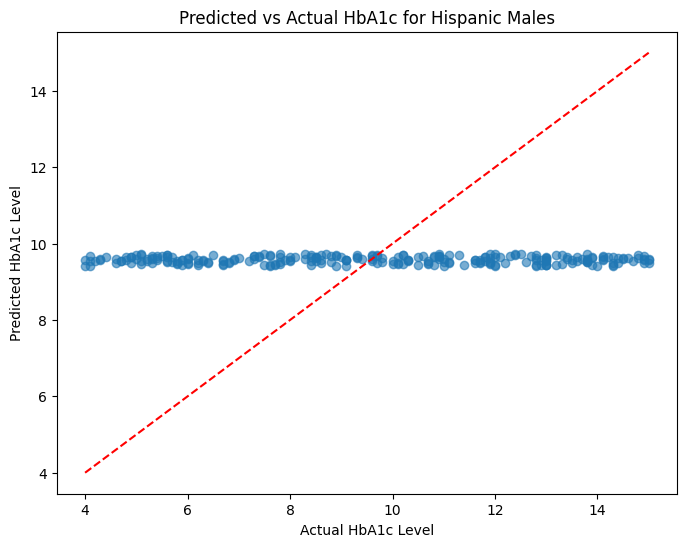

In [89]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual HbA1c Level")
plt.ylabel("Predicted HbA1c Level")
plt.title("Predicted vs Actual HbA1c for Hispanic Males")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Reflection

This notebook demonstrates a basic approach to using supervised learning for predicting HbA1c levels among Hispanic males. The model is too simple to perform such a predictive task based on the dataset information. A more complex and intricate model would be necessary to see any possible benefit from this supervised learning model. 


- Show how filtering data to target a specific demographic can be used
- Use of supervised linear regression for ease of use and visibility
- Evaluation using MSE metric shows the request for predicting Diabetes is not possible with this model

This model will need more development or include higher order regressino model in order to be used for early intervention efforts and better health outcomes for minority communities.
